<a href="https://colab.research.google.com/github/DavyL0/Data-Analize-Bank/blob/main/Profissao_Cientista_de_Dados_M10_support_material_assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [2]:
sc = pd.read_csv('previsao_de_renda.csv')
sc.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
sc.shape

(15000, 16)

In [4]:
n_meses = 3
n_clientes = 210

datas = pd.Series(pd.date_range('1/1/2015', periods = n_meses, freq = 'MS').repeat(n_clientes))

dados = sc.sample(n = n_meses * n_clientes, replace=True).reset_index()

tips2 = pd.concat([datas, dados], axis = 1)
tips2.rename({3:'data_ref'}, inplace = True, axis = 'columns')
tips2 = tips2.sort_values('data_ref')
tips2

,0,level_0,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
88,2015-01-01,292,292,2015-01-01,13856,M,True,True,1,Assalariado,Secundário,Casado,Casa,27,4.873973,3.0,False,11872.14
381,2015-02-01,892,892,2015-01-01,6482,F,True,True,0,Pensionista,Secundário,Casado,Governamental,65,NaN,2.0,False,1733.31
605,2015-03-01,565,565,2015-01-01,12565,F,True,False,0,Assalariado,Secundário,Casado,Casa,46,1.865753,2.0,False,2846.73
516,2015-03-01,491,491,2015-01-01,15913,F,False,False,0,Empresário,Secundário,Casado,Casa,51,16.972603,2.0,False,10975.64
518,2015-03-01,626,626,2015-01-01,2503,F,False,True,0,Pensionista,Secundário,Separado,Casa,61,NaN,1.0,False,1616.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2015-01-01,14218,14218,2016-03-01,3791,F,True,True,0,Assalariado,Superior incompleto,Casado,Casa,39,19.446575,2.0,False,1586.66
519,2015-03-01,14675,14675,2016-03-01,983,F,False,False,0,Assalariado,Superior completo,Casado,Casa,52,13.257534,2.0,False,5201.58
382,2015-02-01,14796,14796,2016-03-01,4732,F,False,True,0,Pensionista,Superior completo,Viúvo,Casa,57,NaN,1.0,False,3070.82
58,2015-01-01,14340,14340,2016-03-01,6814,F,True,True,0,Assalariado,Superior completo,Casado,Casa,50,26.641096,2.0,False,36778.02


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


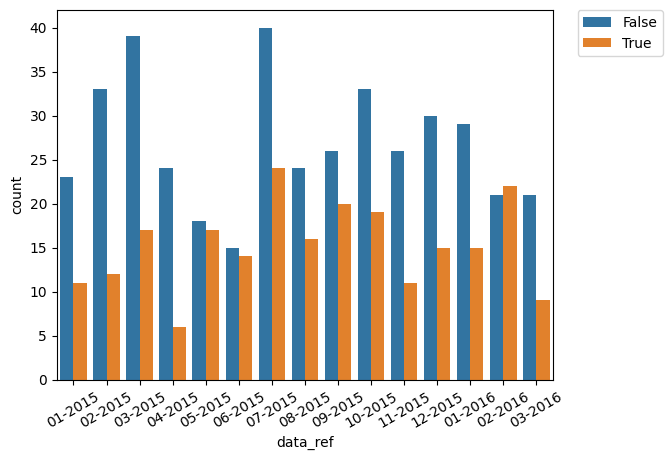

In [5]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=tips2)

# Convert 'data_ref' column to datetime objects
tips2['data_ref'] = pd.to_datetime(tips2['data_ref'])

tick_labs = tips2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(tips2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

<ipython-input-10-faa66fc342a7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="idade", hue = 'sexo',
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


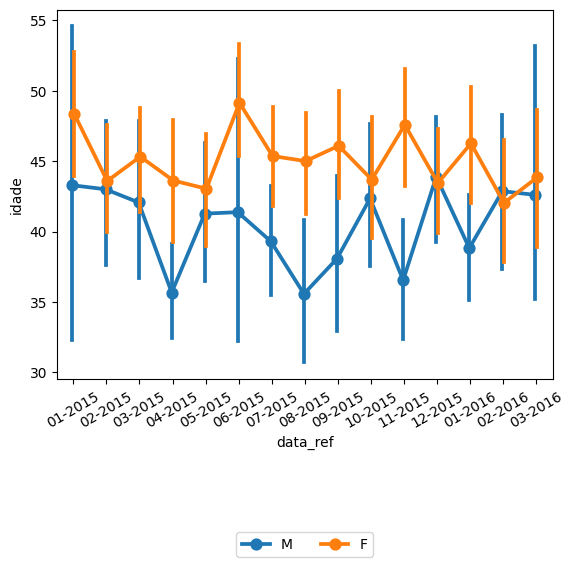

In [10]:
ax = sns.pointplot(x="data_ref", y="idade", hue = 'sexo',
                   data=tips2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = tips2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(tips2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

<ipython-input-11-99dd23469c49>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="idade", hue = 'posse_de_veiculo',
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


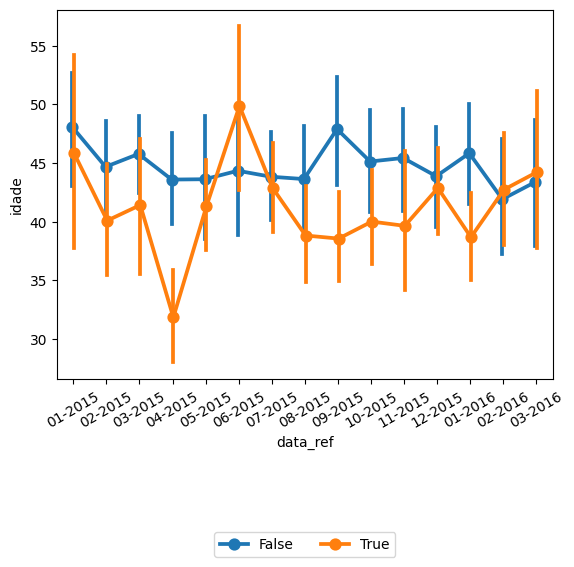

In [11]:
ax = sns.pointplot(x="data_ref", y="idade", hue = 'posse_de_veiculo',
                   data=tips2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = tips2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(tips2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

<ipython-input-12-d659f22ac15a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="idade", hue = 'posse_de_imovel',
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


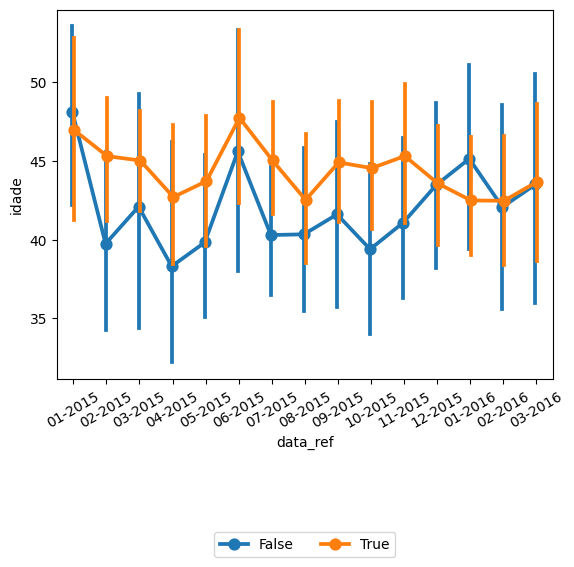

In [12]:
ax = sns.pointplot(x="data_ref", y="idade", hue = 'posse_de_imovel',
                   data=tips2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = tips2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(tips2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

<ipython-input-13-4e4b51699d6d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="data_ref", y="idade", hue = 'estado_civil',
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future vers

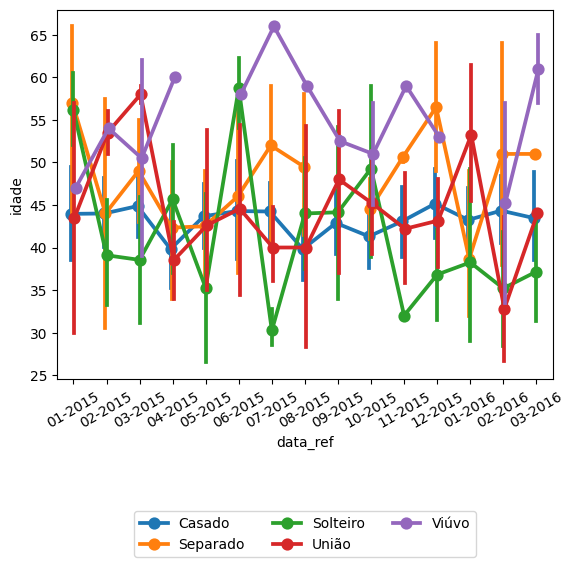

In [13]:
ax = sns.pointplot(x="data_ref", y="idade", hue = 'estado_civil',
                   data=tips2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = tips2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(tips2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=30)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

No geral pode se analisar que a maioria das pessoas que tem imovel e veiculo são acima dos quarenta anos e a maioria das contas de homens abaixo dos 50 e mulheres acima dos 40, so o estádo civil existe uma grande variancia então não acredito que seja necessário avaliar. Entretanto pode se ver que o número de casados se manteu estavel e o estado de união teve uma grande variancia no geral.